In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import category_encoders as ce

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [325]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [525]:
df = pd.read_csv('Dub4 Auction Groups alt clusters.csv')
df.shape

(127, 63)

In [526]:
df.head()

,row,aid,auction_id,auction_link,catalogue_link,title,Dub4FINAL,Dub4,assignments4,no_pieces,circa,year_made,med_1,med_2,med_3,support,height,width,signed,motif,subject,style,Auction.House,Location,Year.Sold,Date,Lot.Number,Day,Evening,Auction.Name,Currency,Low.Estimate,High.Estimate,Sale.Price,Ave$ per Bin,no_prov,prov_eigen_sum,prov_eigen_avg,prov_deg_sum,prov_deg_avg,collection_type,current_collection,collection_ranking,node_id,museum_value,city,country,no_pub,no_semex,no_ex,no_exspaces,eigen_sum_ex,eigen_avg_ex,deg_sum_ex,deg_avg_ex,color_1,color_2,red,green,blue,hue,saturation,light
0,103,a1996_012,A_017,https://www.sothebys.com/en/auctions/ecatalogu...,https://www.artifexpress.com/catalogues/agnes-...,Untitled #12,0,2,25,1,0,1996,acrylic,graphite,NaN,canvas,152.4,152.4,1,invisible,bands,field,Sotheby's,New York,2017,11/16/2017,57,0,1,Contemporary Art Evening Auction,USD,"$3,000,000","$4,000,000","$2,775,000",Err:504,5,1.590505,0.318101,"1,144.00",228.8,2,Private Collection,med,NaN,NaN,NaN,NaN,1,0,1,1,0.232123,0.232123,140.0,140.0,multi,NaN,215,211,202,42,0.14,0.82
1,116,a1999_040,A_033,https://www.sothebys.com/en/auctions/ecatalogu...,https://www.artifexpress.com/catalogues/agnes-...,Untitled,0,2,8,1,0,1999,acrylic,graphite,NaN,canvas,152.4,152.4,0,geometric,bands,field,Sotheby's,New York,2016,5/11/2016,36,0,1,Contemporary Art Evening Auction,USD,"$2,000,000","$3,000,000","$2,410,000",Err:504,7,1.042223,0.148889,785,112.1,2,Private Collection,med,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,multi,NaN,222,211,203,25,0.22,0.83
2,104,a1996_015,A_059,https://www.christies.com/lotfinder/paintings/...,https://www.artifexpress.com/catalogues/agnes-...,Peace,0,2,25,1,0,1996,acrylic,graphite,NaN,canvas,152.4,152.4,1,invisible,bands,field,Christie's,London,2013,2/13/2013,43,0,1,Post-War and Contemporary Art,USD,"$1,243,201","$1,864,801","$1,282,439",Err:504,15,2.431345,0.162090,"1,975.00",131.7,3,Mnuchin Gallery,high,341.0,0.0007,NaN,NaN,2,0,6,6,0.835399,0.139233,402.0,67.0,blue,yellow,213,213,208,60,0.06,0.83
3,126,a2002_009,A_074,https://www.christies.com/lotfinder/paintings/...,https://www.artifexpress.com/catalogues/agnes-...,Untitled #9,0,2,8,1,0,2002,acrylic,graphite,NaN,canvas,152.4,152.4,1,geometric,symmetry,field,Christie's,New York,2011,5/11/2011,48,0,1,Post-War and Contemporary Art Evening Sale,USD,"$1,200,000","$1,800,000","$1,314,500",Err:504,5,1.606032,0.321206,"1,197.00",239.4,2,Dirk Cavens,med,NaN,NaN,NaN,NaN,2,0,1,1,0.232123,0.232123,140.0,140.0,multi,NaN,228,222,207,43,0.28,0.85
4,127,a2002_011,A_070,https://www.christies.com/lotfinder/paintings/...,https://www.artifexpress.com/catalogues/agnes-...,Untitled #11,0,2,8,1,0,2002,acrylic,graphite,NaN,canvas,152.4,152.4,1,geometric,bands,field,Christie's,New York,2011,11/8/2011,89,0,1,Post-War Contemporary Evening Sale,USD,"$1,000,000","$1,500,000","$1,082,500",Err:504,5,1.606032,0.321206,"1,197.00",239.4,2,Dirk Cavens,med,NaN,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN,NaN,grey,yellow,236,236,214,60,0.37,0.88


In [527]:
columns = df.columns
columns

Index(['row', 'aid', 'auction_id', 'auction_link', 'catalogue_link', 'title',
       'Dub4FINAL', 'Dub4', 'assignments4', 'no_pieces', 'circa', 'year_made',
       'med_1', 'med_2', 'med_3', 'support', 'height', 'width', 'signed',
       'motif', 'subject', 'style', 'Auction.House', 'Location', 'Year.Sold',
       'Date', 'Lot.Number', 'Day', 'Evening', 'Auction.Name', 'Currency',
       'Low.Estimate', 'High.Estimate', 'Sale.Price', 'Ave$ per Bin',
       'no_prov', 'prov_eigen_sum', 'prov_eigen_avg', 'prov_deg_sum',
       'prov_deg_avg', 'collection_type', 'current_collection',
       'collection_ranking', 'node_id', 'museum_value', 'city', 'country',
       'no_pub', 'no_semex', 'no_ex', 'no_exspaces', 'eigen_sum_ex',
       'eigen_avg_ex', 'deg_sum_ex', 'deg_avg_ex', 'color_1', 'color_2', 'red',
       'green', 'blue', 'hue', 'saturation', 'light'],
      dtype='object')

In [528]:
cols_to_drop = [
    'row',
    'catalogue_link',
    'Dub4',
    'no_pieces',
    'Date',
    'Lot.Number',
    'Auction.Name',
    'Ave$ per Bin',
    'med_3',
    'node_id',
    'museum_value',
    'city',
    'country',
    'color_2',
    'Currency',
    'Low.Estimate',
    'High.Estimate',
    'Sale.Price'
]

In [529]:
df = df.drop(columns=cols_to_drop)
df.shape

(127, 45)

In [530]:
df.head()

,aid,auction_id,auction_link,title,Dub4FINAL,assignments4,circa,year_made,med_1,med_2,support,height,width,signed,motif,subject,style,Auction.House,Location,Year.Sold,Day,Evening,no_prov,prov_eigen_sum,prov_eigen_avg,prov_deg_sum,prov_deg_avg,collection_type,current_collection,collection_ranking,no_pub,no_semex,no_ex,no_exspaces,eigen_sum_ex,eigen_avg_ex,deg_sum_ex,deg_avg_ex,color_1,red,green,blue,hue,saturation,light
0,a1996_012,A_017,https://www.sothebys.com/en/auctions/ecatalogu...,Untitled #12,0,25,0,1996,acrylic,graphite,canvas,152.4,152.4,1,invisible,bands,field,Sotheby's,New York,2017,0,1,5,1.590505,0.318101,"1,144.00",228.8,2,Private Collection,med,1,0,1,1,0.232123,0.232123,140.0,140.0,multi,215,211,202,42,0.14,0.82
1,a1999_040,A_033,https://www.sothebys.com/en/auctions/ecatalogu...,Untitled,0,8,0,1999,acrylic,graphite,canvas,152.4,152.4,0,geometric,bands,field,Sotheby's,New York,2016,0,1,7,1.042223,0.148889,785,112.1,2,Private Collection,med,0,0,0,0,NaN,NaN,NaN,NaN,multi,222,211,203,25,0.22,0.83
2,a1996_015,A_059,https://www.christies.com/lotfinder/paintings/...,Peace,0,25,0,1996,acrylic,graphite,canvas,152.4,152.4,1,invisible,bands,field,Christie's,London,2013,0,1,15,2.431345,0.162090,"1,975.00",131.7,3,Mnuchin Gallery,high,2,0,6,6,0.835399,0.139233,402.0,67.0,blue,213,213,208,60,0.06,0.83
3,a2002_009,A_074,https://www.christies.com/lotfinder/paintings/...,Untitled #9,0,8,0,2002,acrylic,graphite,canvas,152.4,152.4,1,geometric,symmetry,field,Christie's,New York,2011,0,1,5,1.606032,0.321206,"1,197.00",239.4,2,Dirk Cavens,med,2,0,1,1,0.232123,0.232123,140.0,140.0,multi,228,222,207,43,0.28,0.85
4,a2002_011,A_070,https://www.christies.com/lotfinder/paintings/...,Untitled #11,0,8,0,2002,acrylic,graphite,canvas,152.4,152.4,1,geometric,bands,field,Christie's,New York,2011,0,1,5,1.606032,0.321206,"1,197.00",239.4,2,Dirk Cavens,med,1,0,0,0,NaN,NaN,NaN,NaN,grey,236,236,214,60,0.37,0.88


In [91]:
((df['Dub4FINAL'] == df['assignments4']).sum() / len(df)))

48.818897637795274

In [531]:
num_na_cols = ['eigen_sum_ex', 'eigen_avg_ex', 'deg_sum_ex', 'deg_avg_ex']

df[num_na_cols] = df[num_na_cols].fillna(0)

In [532]:
df['med_2'] = df['med_2'].fillna('none')

In [533]:
df['prov_deg_sum'] = df['prov_deg_sum'].apply(lambda x: float(x.replace(',','')))

In [551]:
df_features = df.iloc[:,6:]

In [552]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(df_features)

In [553]:
X_train.shape

(127, 109)

In [554]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train2)

In [555]:
X_train

array([[-0.25928149,  1.08158638,  0.60464154, ..., -0.49589163,
        -0.1414437 ,  0.22475751],
       [-0.25928149,  1.2868077 ,  0.60464154, ..., -0.68421705,
         0.39678401,  0.2870811 ],
       [-0.25928149,  1.08158638,  0.60464154, ..., -0.29648824,
        -0.67967141,  0.2870811 ],
       ...,
       [-0.25928149,  1.2868077 ,  0.60464154, ..., -0.69529502,
        -0.47783602,  0.72334622],
       [-0.25928149,  1.2868077 ,  0.60464154, ...,  1.56461005,
        -0.1414437 ,  0.91031699],
       [-0.25928149,  1.2868077 ,  0.60464154, ..., -0.69529502,
        -0.47783602,  0.72334622]])

In [556]:
transformer = KernelPCA(n_components=28, kernel='sigmoid')
X_transformed = transformer.fit_transform(X_train)

In [557]:
X = pd.DataFrame(X_transformed2)
X.shape

(127, 59)

In [558]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,-0.182096,-0.065680,-0.018380,-0.019181,-0.039974,-0.106865,-0.076927,-0.063933,0.088523,-0.052495,-0.031170,-0.022407,-0.053184,0.013207,0.039933,0.023414,0.036214,0.003227,-0.019032,0.024863,-0.007914,0.048003,0.011431,-0.001396,-0.027683,0.000428,-0.004561,-0.002726,-0.022927,0.010906,0.015693,0.012167,0.005102,-0.001297,-0.004210,-0.027316,-0.002100,-0.017435,-0.013853,0.038868,-0.010844,-0.005881,0.017735,-0.009974,-0.003783,-0.014887,-0.031758,-0.008608,0.007765,0.018135,0.006346,0.015486,-0.007222,0.012424,-0.000915,0.026484,0.012460,-0.011035,1.039160e-08
1,-0.060209,-0.160668,-0.062805,-0.027845,0.091353,-0.068088,-0.085104,-0.073515,0.048630,-0.154672,-0.030965,-0.035046,-0.044594,-0.035162,0.071480,0.007238,0.007471,0.073765,0.019361,0.007559,0.092998,0.048839,0.064348,-0.034214,-0.036312,-0.031294,0.015853,-0.039867,0.043361,0.090630,0.042603,-0.021844,0.005085,-0.000314,-0.000109,0.015330,0.019367,-0.009010,-0.011055,-0.028326,0.024165,-0.039733,-0.020551,-0.028709,-0.032749,-0.003619,0.018171,-0.011653,-0.038264,0.025992,0.004194,0.000132,0.002610,-0.016214,0.003836,0.000551,-0.000881,0.007137,1.039160e-08
2,-0.113039,0.094176,-0.075395,-0.001364,0.225519,-0.046182,-0.167531,0.371455,-0.125874,0.057338,-0.099461,0.029899,0.062412,0.046289,-0.028288,-0.034432,0.016911,-0.015199,0.098372,0.021376,-0.047085,0.059175,0.030792,-0.016174,0.007013,-0.028465,-0.043008,0.013383,-0.005387,-0.005605,0.000168,-0.000066,0.011515,-0.033437,-0.003979,0.007682,-0.010466,-0.013515,0.003912,-0.021178,0.011032,0.010606,0.025028,0.004181,-0.003764,-0.008235,0.005890,0.001429,-0.001177,0.005992,0.000841,0.004794,-0.008606,0.007679,-0.007240,0.002370,0.000334,0.000479,1.039160e-08
3,-0.150522,-0.129779,0.043002,-0.002153,-0.039049,0.088968,-0.122392,-0.038919,-0.000461,0.031935,0.107017,0.023718,-0.019607,-0.009872,0.127111,0.052550,0.003342,-0.000269,0.020597,0.073922,0.230315,-0.009622,0.036535,-0.120189,0.039340,-0.140086,-0.081662,0.131686,-0.112592,-0.079389,-0.023504,-0.045613,0.012183,0.020969,-0.003248,-0.015229,0.005608,-0.002602,-0.013723,0.035185,0.007502,-0.007687,-0.003133,0.016539,0.039018,-0.010645,-0.013108,-0.017953,-0.000556,0.000384,-0.009302,0.016279,0.001050,-0.006682,0.002725,-0.004314,0.002413,0.006300,1.039160e-08
4,-0.174231,-0.189205,0.007307,-0.055185,-0.019757,0.075009,-0.058197,-0.021989,-0.083323,-0.015403,0.121320,0.021737,0.057359,0.062486,0.086529,0.039272,-0.003203,-0.032694,0.053684,-0.051845,0.189081,-0.065582,0.012967,-0.078961,0.056436,-0.053963,-0.048436,0.088603,-0.094197,-0.017286,-0.000363,-0.059806,-0.047015,0.028305,0.016313,0.017389,-0.005887,0.018571,0.006001,-0.023441,-0.024514,0.023896,0.005357,0.000860,-0.015848,0.009731,0.010716,0.016875,0.007401,-0.003197,0.003137,-0.017571,0.003495,0.006268,-0.006135,0.002353,-0.005929,-0.007328,1.039160e-08


In [559]:
k = 27
kmeans = KMeans(n_clusters=k, random_state=42)
k_pred = kmeans.fit_predict(X)
k_pred

array([16, 16,  0, 10,  1, 16, 16, 10, 10, 17, 23, 10, 20, 20,  6,  1,  7,
       22, 12,  3,  3,  2,  2, 16, 11, 17, 17, 26,  1, 17, 26, 15, 23,  8,
        9,  9, 18, 18, 21, 21, 23, 23, 23,  1, 10, 17, 10, 14, 10,  2,  2,
       10, 16, 16, 10, 16, 10, 16,  6,  5,  5,  5,  2,  5, 19,  2, 19, 23,
       15, 23, 23, 23, 23, 23, 15,  8,  8, 23, 23, 16,  1,  1,  0,  1, 12,
       12, 25,  8, 16, 25, 25,  1,  8, 16, 23, 11, 11, 16, 16, 17,  1, 10,
       24,  1,  0,  6,  6,  6,  6,  0,  0,  3,  3,  7, 20,  4, 14,  7,  7,
        4, 20, 20, 13, 16, 13, 11, 13], dtype=int32)

In [560]:
X['cluster'] = k_pred

In [561]:
X['cluster'].value_counts()

16    15
23    14
10    11
1     10
2      6
6      6
17     6
0      5
20     5
8      5
11     4
3      4
5      4
7      4
13     3
12     3
25     3
15     3
9      2
14     2
18     2
19     2
4      2
21     2
26     2
22     1
24     1
Name: cluster, dtype: int64

In [478]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 126 nearest neighbors...
[t-SNE] Indexed 127 samples in 0.000s...
[t-SNE] Computed neighbors for 127 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 127 / 127
[t-SNE] Mean sigma: 3.878953
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.542160
[t-SNE] KL divergence after 300 iterations: 0.093217


In [347]:
tsne_results.shape

(127, 2)

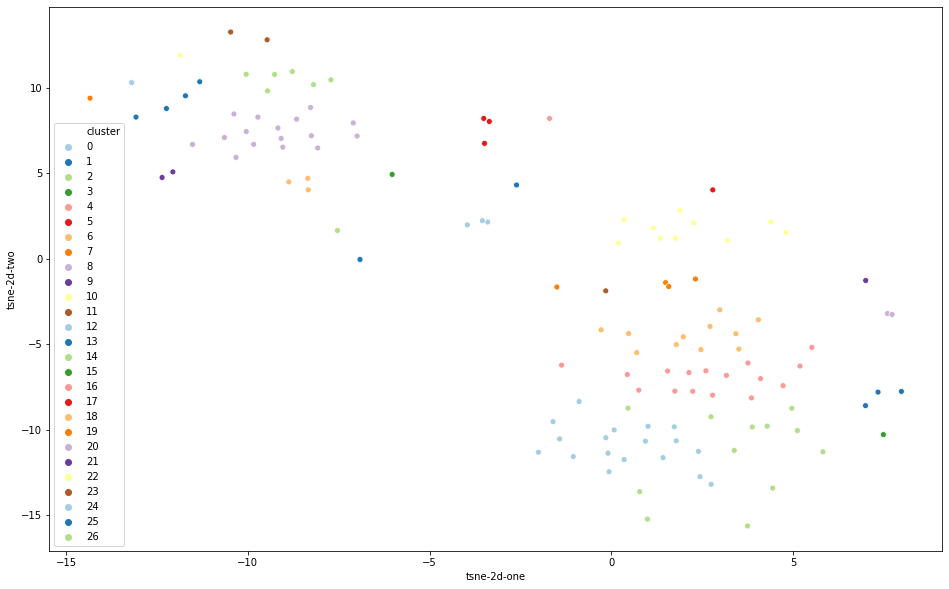

In [182]:
X['tsne-2d-one'] = tsne_results[:,0]
X['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
        x='tsne-2d-one',
        y='tsne-2d-two',
        hue='cluster',
        palette=sns.color_palette('Paired', 27),
        data=X,
        alpha=1
);

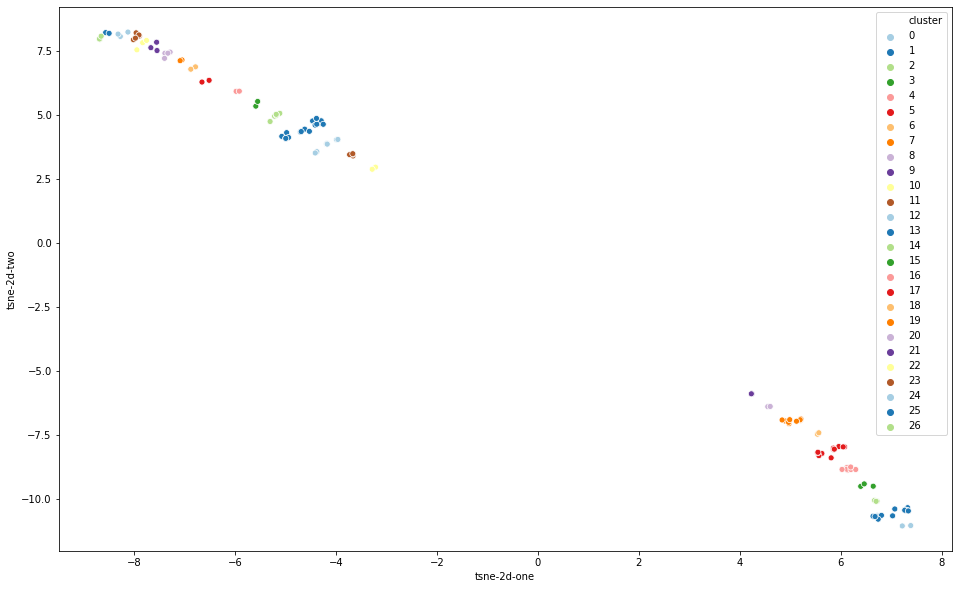

In [173]:
X['tsne-2d-one'] = tsne_results[:,0]
X['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
        x='tsne-2d-one',
        y='tsne-2d-two',
        hue='cluster',
        palette=sns.color_palette('Paired', 27),
        data=X,
        alpha=1
);

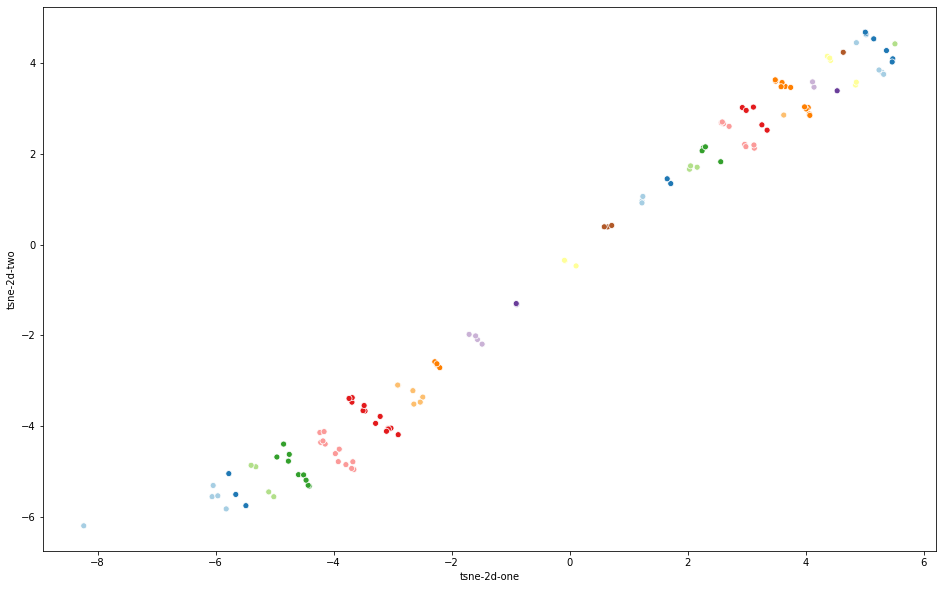

In [483]:
X['tsne-2d-one'] = tsne_results[:,0]
X['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
        x='tsne-2d-one',
        y='tsne-2d-two',
        hue='cluster',
        palette=sns.color_palette('Paired', 27),
        data=X,
        legend=False
);

In [562]:
df['cluster'] = X['cluster']